In [1]:
import sys
sys.path.append("../..")

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tangle.analysis.clusters import load, compute_clusters, partitions, load_dataset, sample_labels

In [5]:
approval_count, idx_to_client, clients_to_clusters = load("tangle_poets-stacked_lstm-29_82.json")

In [6]:
clusters = compute_clusters(approval_count)

In [7]:
ps = partitions(clusters, idx_to_client, 20)

In [8]:
[len(x) for x in ps]

[67, 42, 39, 29, 24, 21, 20, 17, 13, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
from collections import Counter

In [28]:
counters = [Counter([clients_to_clusters[c] for c in p if c != 'genesis']) for p in ps]
most_common = [x for c in counters for x in c.most_common(1)]
cluster_results = [(common[0], len(ps[i]), common[1] / len(ps[i])) for i, common in enumerate(most_common)]
cluster_results

[(1, 67, 0.9253731343283582),
 (0, 42, 0.9047619047619048),
 (0, 39, 0.8717948717948718),
 (0, 29, 0.9310344827586207),
 (1, 24, 0.5833333333333334),
 (0, 21, 0.7142857142857143),
 (1, 20, 0.8),
 (1, 17, 0.5294117647058824),
 (0, 13, 0.8461538461538461)]

In [32]:
misclustering_percentage = 1 - (sum([count * correct_percent for _, count, correct_percent in cluster_results]) / sum([len(x) for x in ps]))
misclustering_percentage

0.17216117216117222

In [9]:
data = load_dataset('../.././experiments/data-large/femnist/data')
known_labels = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [11]:
interesting_partitions = 10

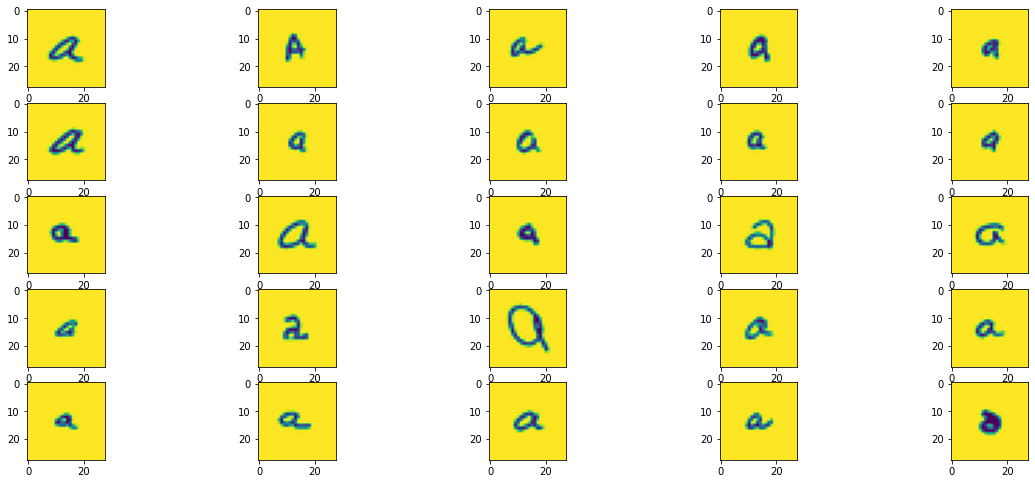

In [12]:
sample_labels(ps[:interesting_partitions], data, 'a', known_labels)

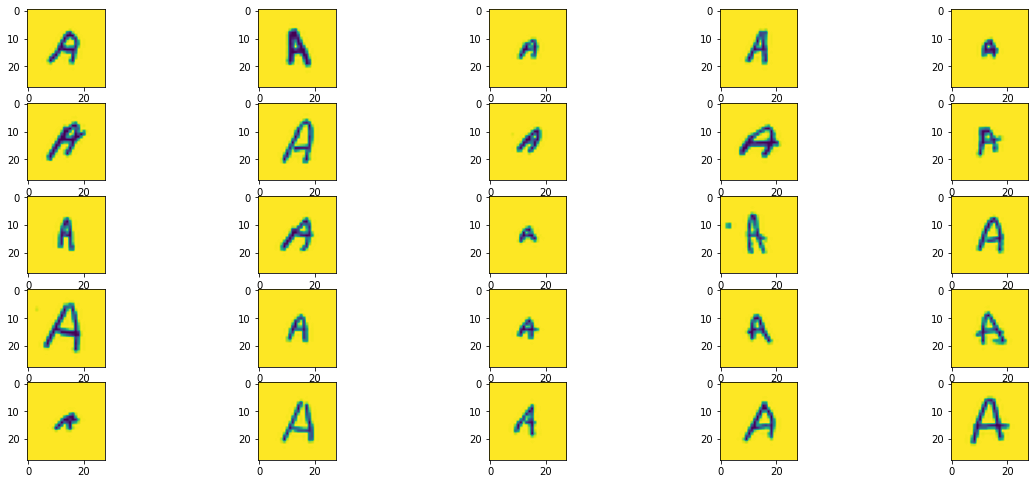

In [26]:
sample_labels(ps[:interesting_partitions], data, 'A', known_labels)

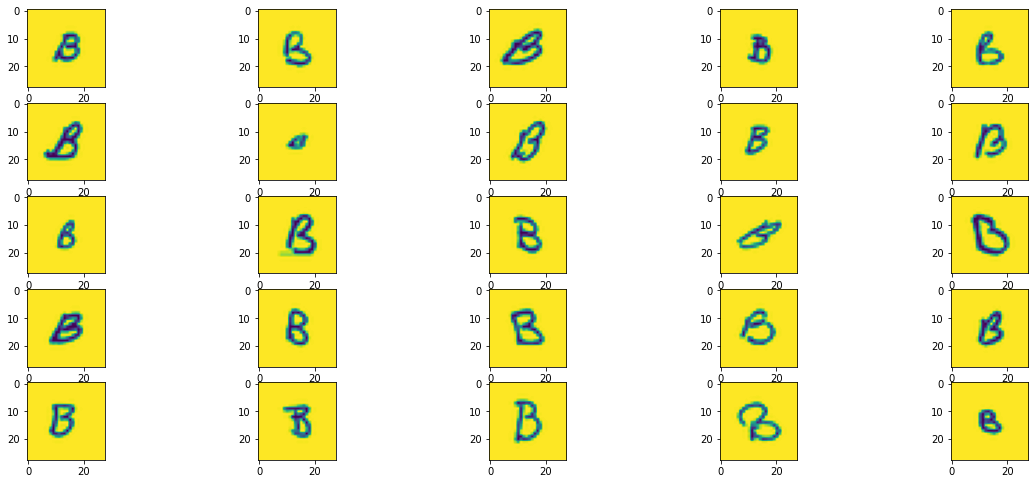

In [25]:
sample_labels(ps[:interesting_partitions], data, 'B', known_labels)

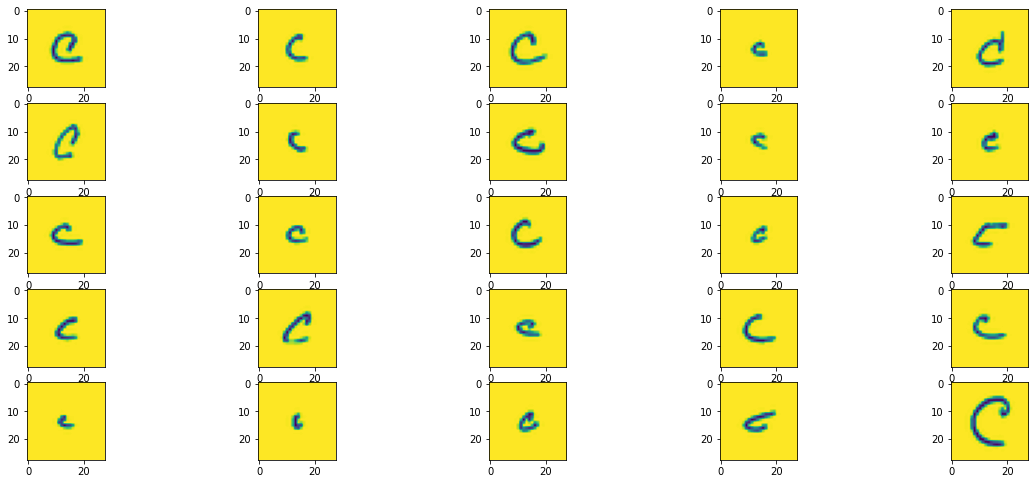

In [27]:
sample_labels(ps[:interesting_partitions], data, 'C', known_labels)